<a href="https://colab.research.google.com/github/Sophia-vanegas/EDAsemillero/blob/main/EDA_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Paso 2: Cargar datos
df = pd.read_csv('/content/ventas.csv')

In [ ]:
# Paso 3: Exploración inicial
#print(df.tail())
#print(df.info())
print(df.describe())

            precio  cantidad_vendida
count   200.000000        200.000000
mean    804.083100         10.200000
std     451.698688          5.628356
min      29.760000          1.000000
25%     437.497500          5.000000
50%     857.845000         10.000000
75%    1222.660000         15.000000
max    1496.630000         19.000000


In [ ]:
# Paso 4: Detección de valores nulos
print(df.isnull().sum())

producto            0
categoria           0
precio              0
cantidad_vendida    0
fecha_venta         0
dtype: int64


In [ ]:
# Paso 5: Estadísticas básicas
print(df['precio'].mean())
print(df['producto'].value_counts())

804.0831
producto
Pesas              15
Lego               15
Tablet             14
Cafetera           14
Raqueta            13
Refrigerador       11
Auriculares        10
Smartphone         10
Aspiradora         10
Chaqueta           10
Carrito             9
Pantalón            9
Laptop              9
Camisa              9
Balón de fútbol     8
Puzzle              8
Bicicleta           7
Microondas          7
Muñeca              6
Zapatos             6
Name: count, dtype: int64


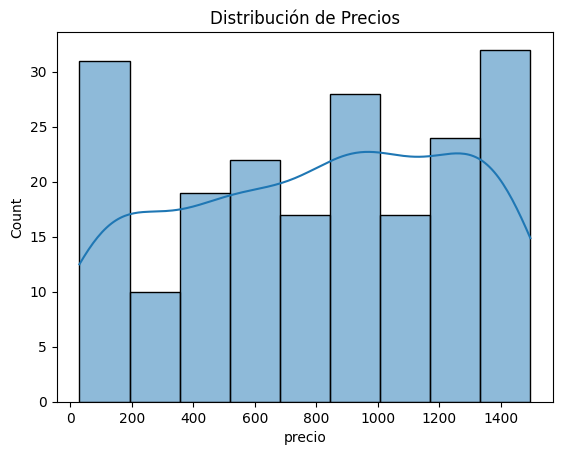

In [ ]:
# Paso 6: Visualización
sns.histplot(df['precio'], kde=True)
plt.title('Distribución de Precios')
plt.show()

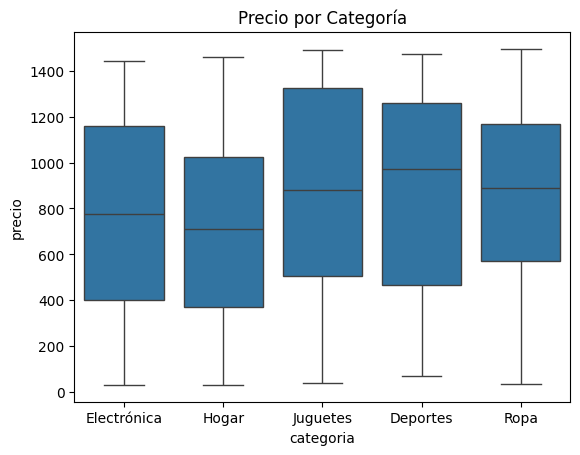

In [ ]:
sns.boxplot(x='categoria', y='precio', data=df)
plt.title('Precio por Categoría')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns
taxis= sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [3]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

Deteccion de outliers(Univariate outlier)

- Histogramas
- Box plots
- Z-score
- Rango intercuartil(IQR)

In [5]:
#Deteccion de outliers(Univariate outlier)

taxis['total'].describe()

,total
count,6433.000000
mean,18.517794
std,13.815570
min,1.300000
25%,10.800000
50%,14.160000
75%,20.300000
max,174.820000


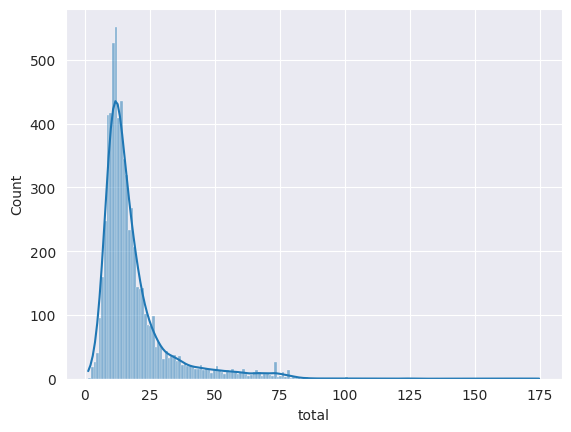

In [6]:
#Histograma
sns.set_style('darkgrid')
g= sns.histplot(taxis['total'],kde=True)
plt.show()